In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
%matplotlib inline
import requests
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [11]:
features=pd.read_csv("Datasets/loan.csv")
features.head(30)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.00,credit_card,AZ,27.65,0.0,83.70,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.00,car,GA,1.00,0.0,9.40,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.00,small_business,IL,8.72,0.0,98.50,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.00,other,CA,20.00,0.0,21.00,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.00,wedding,AZ,11.20,0.0,28.30,12.0,0,7.0,verified
5,3000,36 months,18.64,9.0,RENT,48000.00,car,CA,5.35,0.0,87.50,4.0,0,4.0,verified
6,5600,60 months,21.28,4.0,OWN,40000.00,small_business,CA,5.55,0.0,32.60,13.0,1,7.0,verified
7,5375,60 months,12.69,0.0,RENT,15000.00,other,TX,18.08,0.0,36.50,3.0,1,7.0,verified
8,6500,60 months,14.65,5.0,OWN,72000.00,debt_consolidation,AZ,16.12,0.0,20.60,23.0,0,13.0,not verified
9,12000,36 months,12.69,10.0,OWN,75000.00,debt_consolidation,CA,10.78,0.0,67.10,34.0,0,22.0,verified


In [12]:
features_with_dummies = pd.get_dummies(features, sparse=True)
features_with_dummies

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,verification_status_not verified,verification_status_verified
0,5000,10.65,10.0,24000.00,27.65,0.0,83.70,9.0,0,26.0,...,0,0,0,0,0,0,0,0,0,1
1,2500,15.27,0.0,30000.00,1.00,0.0,9.40,4.0,1,12.0,...,0,0,0,0,0,0,0,0,0,1
2,2400,15.96,10.0,12252.00,8.72,0.0,98.50,10.0,0,10.0,...,0,0,0,0,0,0,0,0,1,0
3,10000,13.49,10.0,49200.00,20.00,0.0,21.00,37.0,0,15.0,...,0,0,0,0,0,0,0,0,0,1
4,5000,7.90,3.0,36000.00,11.20,0.0,28.30,12.0,0,7.0,...,0,0,0,0,0,0,0,0,0,1
5,3000,18.64,9.0,48000.00,5.35,0.0,87.50,4.0,0,4.0,...,0,0,0,0,0,0,0,0,0,1
6,5600,21.28,4.0,40000.00,5.55,0.0,32.60,13.0,1,7.0,...,0,0,0,0,0,0,0,0,0,1
7,5375,12.69,0.0,15000.00,18.08,0.0,36.50,3.0,1,7.0,...,1,0,0,0,0,0,0,0,0,1
8,6500,14.65,5.0,72000.00,16.12,0.0,20.60,23.0,0,13.0,...,0,0,0,0,0,0,0,0,1,0
9,12000,12.69,10.0,75000.00,10.78,0.0,67.10,34.0,0,22.0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
features_with_dummies.columns
features_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 84 columns):
loan_amnt                           -163987 non-null int64
int_rate                            -163987 non-null float64
emp_length                          -169791 non-null float64
annual_inc                          -163991 non-null float64
dti                                 -163987 non-null float64
delinq_2yrs                         -164016 non-null float64
revol_util                          -164180 non-null float64
total_acc                           -164016 non-null float64
bad_loan                            -163987 non-null int64
longest_credit_length               -164016 non-null float64
term_36 months                      -163987 non-null Sparse[uint8, 0]
term_60 months                      -163987 non-null Sparse[uint8, 0]
home_ownership_ANY                  -163987 non-null Sparse[uint8, 0]
home_ownership_MORTGAGE             -163987 non-null Sparse[uint8, 0]
hom

In [14]:
features.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
count,163987.000000,163987.000000,158183.000000,1.639830e+05,163987.000000,163958.000000,163794.000000,163958.000000,163987.000000,163958.000000
mean,13074.169141,13.715904,5.684353,7.191567e+04,15.881530,0.227357,54.079173,24.579734,0.183039,14.854274
std,7993.556189,4.391940,3.610664,5.907092e+04,7.587668,0.694168,25.285367,11.685190,0.386700,6.947733
min,500.000000,5.420000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7000.000000,10.650000,2.000000,4.500000e+04,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000
50%,11325.000000,13.490000,6.000000,6.100000e+04,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000
75%,18000.000000,16.320000,10.000000,8.500000e+04,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000
max,35000.000000,26.060000,10.000000,7.141778e+06,39.990000,29.000000,150.700000,118.000000,1.000000,65.000000


In [15]:
# print(features.shape)
features_with_dummies.isnull().sum()

loan_amnt                              0.0
int_rate                               0.0
emp_length                          5804.0
annual_inc                             4.0
dti                                    0.0
delinq_2yrs                           29.0
revol_util                           193.0
total_acc                             29.0
bad_loan                               0.0
longest_credit_length                 29.0
term_36 months                         0.0
term_60 months                         0.0
home_ownership_ANY                     0.0
home_ownership_MORTGAGE                0.0
home_ownership_NONE                    0.0
home_ownership_OTHER                   0.0
home_ownership_OWN                     0.0
home_ownership_RENT                    0.0
purpose_car                            0.0
purpose_credit_card                    0.0
purpose_debt_consolidation             0.0
purpose_educational                    0.0
purpose_home_improvement               0.0
purpose_hou

In [16]:
features_with_dummies.fillna(features_with_dummies.mean(), inplace=True)

In [17]:
features_with_dummies.isna().sum()

loan_amnt                           0.0
int_rate                            0.0
emp_length                          0.0
annual_inc                          0.0
dti                                 0.0
delinq_2yrs                         0.0
revol_util                          0.0
total_acc                           0.0
bad_loan                            0.0
longest_credit_length               0.0
term_36 months                      0.0
term_60 months                      0.0
home_ownership_ANY                  0.0
home_ownership_MORTGAGE             0.0
home_ownership_NONE                 0.0
home_ownership_OTHER                0.0
home_ownership_OWN                  0.0
home_ownership_RENT                 0.0
purpose_car                         0.0
purpose_credit_card                 0.0
purpose_debt_consolidation          0.0
purpose_educational                 0.0
purpose_home_improvement            0.0
purpose_house                       0.0
purpose_major_purchase              0.0


In [18]:
print(features_with_dummies.shape)

(163987, 84)


In [19]:
features_with_dummies.columns

Index(['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'revol_util', 'total_acc', 'bad_loan',
       'longest_credit_length', 'term_36 months', 'term_60 months',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'addr_state_AK', 'addr_state_AL',
       'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO',
       'addr_state_CT', 'addr_state_DC', 'addr_state_DE', 'addr_state_FL',
       'addr_state_GA', 'addr_state_HI', 'addr_state_IA', 'addr_state_ID',
       'addr_state_IL', 'addr_state_IN', 'addr

In [20]:
X_feature=['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'revol_util', 'total_acc',
       'longest_credit_length', 'term_36 months', 'term_60 months',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'addr_state_AK', 'addr_state_AL',
       'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO',
       'addr_state_CT', 'addr_state_DC', 'addr_state_DE', 'addr_state_FL',
       'addr_state_GA', 'addr_state_HI', 'addr_state_IA', 'addr_state_ID',
       'addr_state_IL', 'addr_state_IN', 'addr_state_KS', 'addr_state_KY',
       'addr_state_LA', 'addr_state_MA', 'addr_state_MD', 'addr_state_ME',
       'addr_state_MI', 'addr_state_MN', 'addr_state_MO', 'addr_state_MS',
       'addr_state_MT', 'addr_state_NC', 'addr_state_NE', 'addr_state_NH',
       'addr_state_NJ', 'addr_state_NM', 'addr_state_NV', 'addr_state_NY',
       'addr_state_OH', 'addr_state_OK', 'addr_state_OR', 'addr_state_PA',
       'addr_state_RI', 'addr_state_SC', 'addr_state_SD', 'addr_state_TN',
       'addr_state_TX', 'addr_state_UT', 'addr_state_VA', 'addr_state_VT',
       'addr_state_WA', 'addr_state_WI', 'addr_state_WV', 'addr_state_WY',
       'verification_status_not verified', 'verification_status_verified']
X=features_with_dummies[['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'revol_util', 'total_acc',
       'longest_credit_length', 'term_36 months', 'term_60 months',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'addr_state_AK', 'addr_state_AL',
       'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO',
       'addr_state_CT', 'addr_state_DC', 'addr_state_DE', 'addr_state_FL',
       'addr_state_GA', 'addr_state_HI', 'addr_state_IA', 'addr_state_ID',
       'addr_state_IL', 'addr_state_IN', 'addr_state_KS', 'addr_state_KY',
       'addr_state_LA', 'addr_state_MA', 'addr_state_MD', 'addr_state_ME',
       'addr_state_MI', 'addr_state_MN', 'addr_state_MO', 'addr_state_MS',
       'addr_state_MT', 'addr_state_NC', 'addr_state_NE', 'addr_state_NH',
       'addr_state_NJ', 'addr_state_NM', 'addr_state_NV', 'addr_state_NY',
       'addr_state_OH', 'addr_state_OK', 'addr_state_OR', 'addr_state_PA',
       'addr_state_RI', 'addr_state_SC', 'addr_state_SD', 'addr_state_TN',
       'addr_state_TX', 'addr_state_UT', 'addr_state_VA', 'addr_state_VT',
       'addr_state_WA', 'addr_state_WI', 'addr_state_WV', 'addr_state_WY',
       'verification_status_not verified', 'verification_status_verified']]
y=features_with_dummies['bad_loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [22]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8138301115921702


In [23]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
feature_imp = pd.Series(clf.feature_importances_,index=X_feature).sort_values(ascending=False)
feature_imp

int_rate                            1.151887e-01
dti                                 1.049530e-01
revol_util                          1.015458e-01
annual_inc                          9.792681e-02
loan_amnt                           8.835287e-02
total_acc                           8.133396e-02
longest_credit_length               7.601768e-02
emp_length                          5.382963e-02
delinq_2yrs                         1.749423e-02
purpose_debt_consolidation          1.208325e-02
addr_state_CA                       1.156309e-02
term_60 months                      9.913096e-03
addr_state_NY                       9.172008e-03
purpose_credit_card                 8.639416e-03
home_ownership_RENT                 8.211599e-03
addr_state_FL                       8.196371e-03
home_ownership_MORTGAGE             8.082348e-03
term_36 months                      7.945642e-03
verification_status_not verified    7.718121e-03
addr_state_TX                       7.485410e-03
verification_status_

In [24]:
top_features = feature_imp.head(10)
top_features

int_rate                      0.115189
dti                           0.104953
revol_util                    0.101546
annual_inc                    0.097927
loan_amnt                     0.088353
total_acc                     0.081334
longest_credit_length         0.076018
emp_length                    0.053830
delinq_2yrs                   0.017494
purpose_debt_consolidation    0.012083
dtype: float64

No handles with labels found to put in legend.


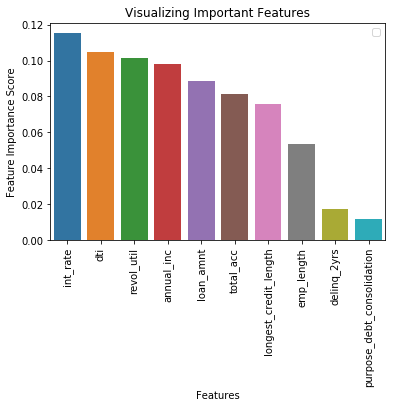

In [25]:
# Creating a bar plot
sns.barplot(x=top_features.index, y=top_features, orient="v")
# Add labels to your graph
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [27]:
features.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'revol_util', 'total_acc', 'bad_loan', 'longest_credit_length',
       'verification_status'],
      dtype='object')

In [28]:
X_features_1=['loan_amnt', 'int_rate', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs',
       'revol_util', 'total_acc', 'longest_credit_length',
       ]
X1=features[['loan_amnt', 'int_rate', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs',
       'revol_util', 'total_acc', 'longest_credit_length',
       ]]
y1=features['bad_loan']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3)

In [29]:
features_with_dummies['home_ownership_ANY']=features_with_dummies.home_ownership_ANY.astype(int)

In [30]:
features_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 84 columns):
loan_amnt                           -163987 non-null int64
int_rate                            -163987 non-null float64
emp_length                          -163987 non-null float64
annual_inc                          -163987 non-null float64
dti                                 -163987 non-null float64
delinq_2yrs                         -163987 non-null float64
revol_util                          -163987 non-null float64
total_acc                           -163987 non-null float64
bad_loan                            -163987 non-null int64
longest_credit_length               -163987 non-null float64
term_36 months                      -163987 non-null Sparse[uint8, 0]
term_60 months                      -163987 non-null Sparse[uint8, 0]
home_ownership_ANY                  -163987 non-null Sparse[int32, 0]
home_ownership_MORTGAGE             -163987 non-null Sparse[uint8, 0]
hom

In [31]:
features=features.drop(columns=['term', 'home_ownership', 'purpose', 'addr_state', 'verification_status'])

Best: -0.438786 using {'n_estimators': 400}
-0.440351 (0.001722) with: {'n_estimators': 50}
-0.439234 (0.002031) with: {'n_estimators': 100}
-0.438993 (0.002183) with: {'n_estimators': 150}
-0.438871 (0.002271) with: {'n_estimators': 200}
-0.438789 (0.002295) with: {'n_estimators': 250}
-0.438795 (0.002333) with: {'n_estimators': 300}
-0.438826 (0.002382) with: {'n_estimators': 350}
-0.438786 (0.002449) with: {'n_estimators': 400}
-0.438787 (0.002453) with: {'n_estimators': 450}
-0.438853 (0.002499) with: {'n_estimators': 500}
-0.438890 (0.002510) with: {'n_estimators': 550}
-0.438928 (0.002584) with: {'n_estimators': 600}
-0.438996 (0.002665) with: {'n_estimators': 650}
-0.439119 (0.002656) with: {'n_estimators': 700}
-0.439297 (0.002695) with: {'n_estimators': 750}
-0.439414 (0.002684) with: {'n_estimators': 800}
-0.439422 (0.002681) with: {'n_estimators': 850}
-0.439529 (0.002727) with: {'n_estimators': 900}
-0.439638 (0.002744) with: {'n_estimators': 950}


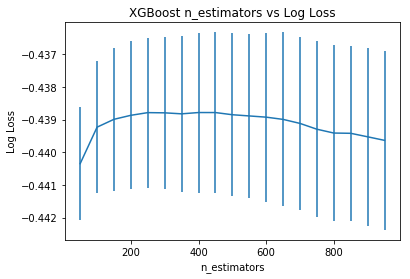

In [32]:
model = XGBClassifier()
n_estimators = range(50, 1000, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train1, y_train1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_1.png')

range(1, 10)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 17.0min finished


Best: -0.438835 using {'max_depth': 3, 'n_estimators': 349}
-0.440050 (0.001885) with: {'max_depth': 1, 'n_estimators': 349}
-0.438908 (0.002148) with: {'max_depth': 2, 'n_estimators': 349}
-0.438835 (0.002378) with: {'max_depth': 3, 'n_estimators': 349}
-0.439134 (0.002456) with: {'max_depth': 4, 'n_estimators': 349}
-0.440427 (0.002611) with: {'max_depth': 5, 'n_estimators': 349}
-0.441847 (0.003070) with: {'max_depth': 6, 'n_estimators': 349}
-0.444214 (0.003417) with: {'max_depth': 7, 'n_estimators': 349}
-0.447299 (0.003555) with: {'max_depth': 8, 'n_estimators': 349}
-0.450735 (0.003693) with: {'max_depth': 9, 'n_estimators': 349}


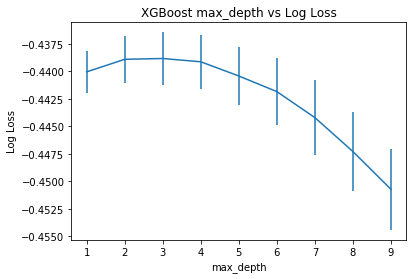

In [33]:
model = XGBClassifier()
max_depth = range(1, 10, 1)
n_estimators = range(349, 350, 1)
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train1, y_train1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth_1.png')

range(1, 10)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 21.8min finished


Best: -0.438835 using {'max_depth': 3, 'n_estimators': 349, 'seed': 349}
-0.440050 (0.001885) with: {'max_depth': 1, 'n_estimators': 349, 'seed': 349}
-0.438908 (0.002148) with: {'max_depth': 2, 'n_estimators': 349, 'seed': 349}
-0.438835 (0.002378) with: {'max_depth': 3, 'n_estimators': 349, 'seed': 349}
-0.439134 (0.002456) with: {'max_depth': 4, 'n_estimators': 349, 'seed': 349}
-0.440427 (0.002611) with: {'max_depth': 5, 'n_estimators': 349, 'seed': 349}
-0.441847 (0.003070) with: {'max_depth': 6, 'n_estimators': 349, 'seed': 349}
-0.444214 (0.003417) with: {'max_depth': 7, 'n_estimators': 349, 'seed': 349}
-0.447299 (0.003555) with: {'max_depth': 8, 'n_estimators': 349, 'seed': 349}
-0.450735 (0.003693) with: {'max_depth': 9, 'n_estimators': 349, 'seed': 349}


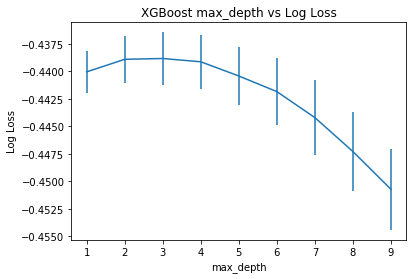

In [34]:
model = XGBClassifier()
max_depth = range(1, 10, 1)
n_estimators = range(349, 350, 1)
seed = range(349, 350, 1)
# num_leaves = range(349, 350, 1)
# min_sum_hessian_in_leaf = range(349, 350, 1)
# min_data_in_leaf = range(349, 350, 1)
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, seed=seed)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train1, y_train1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth_2.png')